In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from simba.config import Config
from simba.simba.simba import Simba
from simba.simba.preprocessing_simba import PreprocessingSimba
from simba.simba.plotting import Plotting
from simba.simba.analog_discovery import AnalogDiscovery
import numpy as np
import spectrum_utils.plot as sup
from rdkit import Chem


Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


* In this notebook, we load spectra from a mgf file and this is run on SIMBA to produce the corresponding edit distance and mces distances

In [3]:
config=Config()

In [4]:
model_location= '/Users/sebas/projects/data/best_model_generated_data_20250130.ckpt'

mgf_file = '/Users/sebas/projects/data/ALL_GNPS_NO_PROPOGATED_wb.mgf'
casmi_file= '/Users/sebas/projects/data/processed_massformer/spec_df.pkl' 

## Initialize Simba

In [5]:
simba= Simba(model_location, config=config, device='cpu', cache_embeddings=True)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


## load mgf file

In [6]:
all_spectrums=PreprocessingSimba.load_spectra(casmi_file, config, use_gnps_format=False)

/Users/sebas/projects/data/processed_massformer/spec_df.pkl


In [7]:
len(all_spectrums)

158

In [8]:
np.random.seed(42)
random_indexes_0= np.random.randint(0,len(all_spectrums),30)
random_indexes_1= np.random.randint(0,len(all_spectrums),10)

In [9]:
## spectrums of the first index
import copy
all_spectrums_0 = copy.deepcopy([all_spectrums[index] for index in random_indexes_0])
all_spectrums_1 = copy.deepcopy([all_spectrums[index] for index in random_indexes_1])

In [10]:
len(all_spectrums_0)

30

## Predictions

In [11]:
sim_ed, sim_mces= simba.predict(all_spectrums_0, all_spectrums_1)

Preprocessing all the data ...


30it [00:00, 28649.62it/s]


Finished preprocessing 
loading data
Normalizing intensities
Preprocessing all the data ...


10it [00:00, 41000.04it/s]
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Finished preprocessing 
loading data
Normalizing intensities
running
Processing embeddings ...


/Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

/Users/sebas/projects/metabolomics/simba/transformers/spectrum_transformer_encoder_custom.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mass_precursor = torch.tensor(kwargs["precursor_mass"].float())
/Users/sebas/projects/metabolomics/simba/transformers/spectrum_transformer_encoder_custom.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  charge_precursor = torch.tensor(kwargs["precursor_charge"].float())
/Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/torch/nn/modules/transformer.py:408: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytor

running
Processing embeddings ...


Predicting: |                                                                                                 …

30it [00:00, 5589.67it/s]

Elapsed time: 0.11 seconds


## Ground truth

In [12]:
from simba.simba.ground_truth import GroundTruth

In [13]:
ground_truth_ed=GroundTruth.compute_edit_distance(all_spectrums_0, all_spectrums_1)

In [14]:
import myopic_mces

In [15]:
ground_truth_mces=GroundTruth.compute_mces(all_spectrums_0, all_spectrums_1)

Running myopic ...
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/7d8b3f03ba354f11a564e9b805a6d0df-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/7d8b3f03ba354f11a564e9b805a6d0df-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 2321 COLUMNS
At line 13218 RHS
At line 15535 BOUNDS
At line 16849 ENDATA
Problem MODEL has 2316 rows, 1313 columns and 8055 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.13 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.13   (Wallclock seconds):       0.15

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/s

(array([  4.,   5.,  32., 120.,  63.,  41.,  20.,   9.,   4.,   2.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <BarContainer object of 10 artists>)

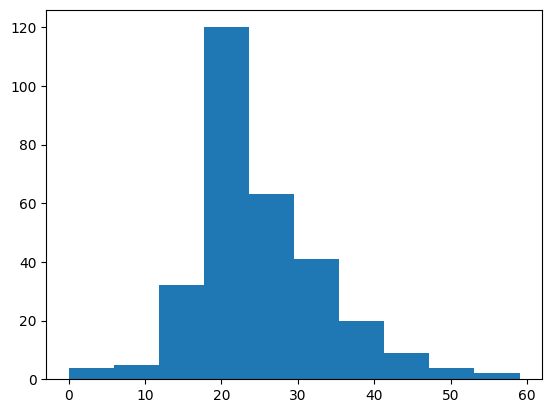

In [16]:
import matplotlib.pyplot as plt
plt.hist(np.reshape(ground_truth_mces,-1))

## Comparison between predictions and ground truth

In [17]:
from scipy.stats import spearmanr

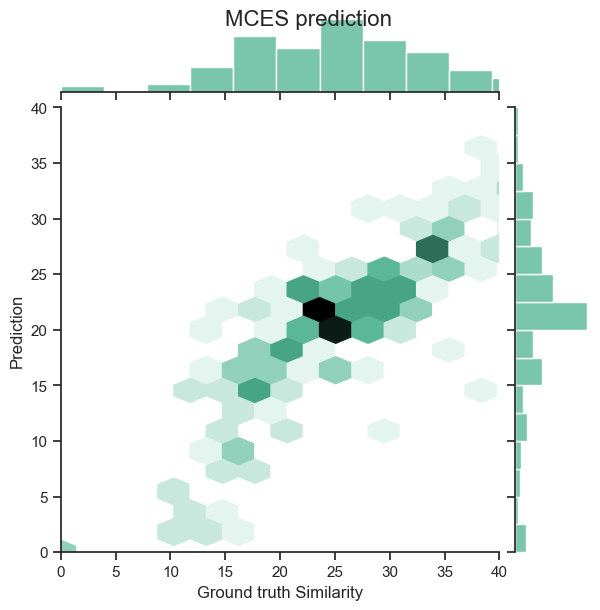

In [18]:
Plotting.plot_mces(np.reshape(ground_truth_mces,-1), np.reshape(sim_mces,-1))

Accuracy: 0.79


/Users/sebas/projects/metabolomics/simba/simba/plotting.py:42: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


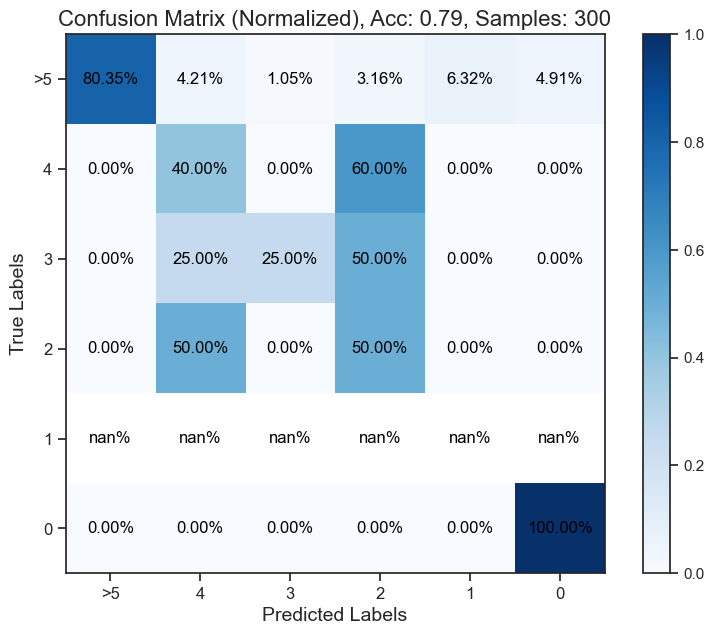

In [19]:
Plotting.plot_cm(5-np.reshape(ground_truth_ed,-1), 5-np.reshape(sim_ed,-1))

## Check the closest spectra

* It returns a ranking matrix where if the score is higher, the similarity is higher based on reranking of MCES and Edit distance 

In [20]:

ranking= AnalogDiscovery.compute_ranking(sim_mces, sim_ed)

## Plot the closest spectra

In [245]:
target_index=8

In [246]:
best_match_index= np.argmax(ranking[target_index])


* Ground truth

In [247]:
print(f'Edit distance {ground_truth_ed[target_index, best_match_index]}, MCES distance {ground_truth_mces[target_index, best_match_index]}')

Edit distance 5.0, MCES distance 31.0


* Prediction

In [248]:
print(f'Edit distance {sim_ed[target_index, best_match_index]}, MCES distance {sim_mces[target_index, best_match_index]}')

Edit distance 5, MCES distance 18.973102569580078


In [249]:
spectra_0= all_spectrums_0[target_index]

In [250]:
spectra_1= all_spectrums_1[best_match_index]

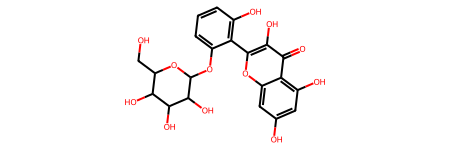

In [251]:
Chem.MolFromSmiles(spectra_0.params['smiles'])

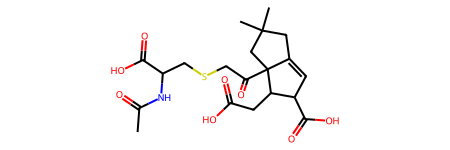

In [252]:
Chem.MolFromSmiles(spectra_1.params['smiles'])

In [226]:
spectra_0.params

{'spectrumid': '69 M+H',
 'name': '69 M+H',
 'inchi': '',
 'organism': 'casmi',
 'id': 69,
 'smiles': 'CC(=O)NC(CSCC(=O)C12CC(C)(C)CC1=CC(C(=O)O)C2CC(=O)O)C(=O)O',
 'ionmode': 'Positive',
 'pepmass': [442.152698645402],
 'charge': [1],
 'libraryquality': 1}

In [227]:
spectra_1.params

{'spectrumid': '69 M+H',
 'name': '69 M+H',
 'inchi': '',
 'organism': 'casmi',
 'id': 69,
 'smiles': 'CC(=O)NC(CSCC(=O)C12CC(C)(C)CC1=CC(C(=O)O)C2CC(=O)O)C(=O)O',
 'ionmode': 'Positive',
 'pepmass': [442.152698645402],
 'charge': [1],
 'libraryquality': 1}

<Axes: xlabel='m/z', ylabel='Intensity'>

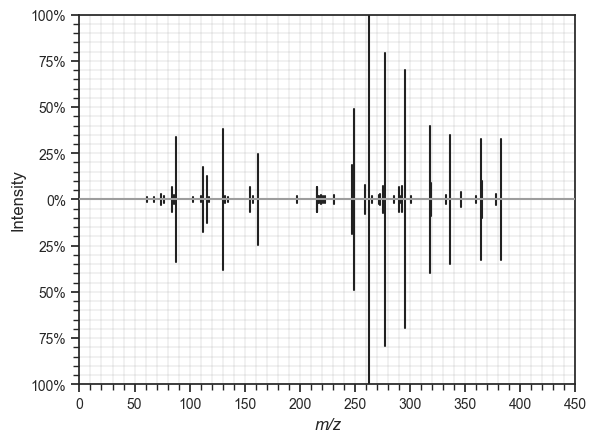

In [228]:
sup.mirror(spectra_0, spectra_1)

## Let's check examples of ground truth edit distance=5 that are classified as high similarity

In [70]:
wrong_prediction = np.argwhere( (sim_ed == 0) & (ground_truth_ed==5))[1]

In [71]:
index_reference = wrong_prediction[0]
index_query= wrong_prediction[1]

In [72]:
index_reference

7

In [73]:
index_query

6

In [74]:
## Prediction ed

In [75]:
spectra_0= all_spectrums_0[index_reference]
spectra_1= all_spectrums_1[index_reference]

In [76]:
spectra_0.params

{'spectrumid': '396 M+H',
 'name': '396 M+H',
 'inchi': '',
 'organism': 'casmi',
 'id': 396,
 'smiles': 'CC1C=CC2CCCCC2C1c1cc(NC(CCC(N)=O)C(=O)O)c(C=O)c(=O)o1',
 'ionmode': 'Positive',
 'pepmass': [417.201470595733],
 'charge': [1],
 'libraryquality': 1}

In [77]:
spectra_1.params

{'spectrumid': '270 M+H',
 'name': '270 M+H',
 'inchi': '',
 'organism': 'casmi',
 'id': 270,
 'smiles': 'Cc1c(O)oc2c1C=C1CCC3C(C)(C)C(O)CCC3(C)C1C2',
 'ionmode': 'Positive',
 'pepmass': [317.210886689853],
 'charge': [1],
 'libraryquality': 1}

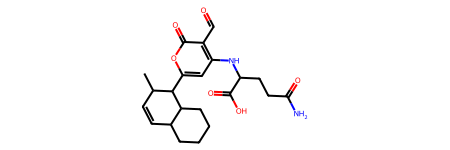

In [78]:
Chem.MolFromSmiles(spectra_0.params['smiles'])

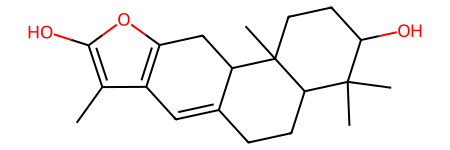

In [79]:
Chem.MolFromSmiles(spectra_1.params['smiles'])

<Axes: xlabel='m/z', ylabel='Intensity'>

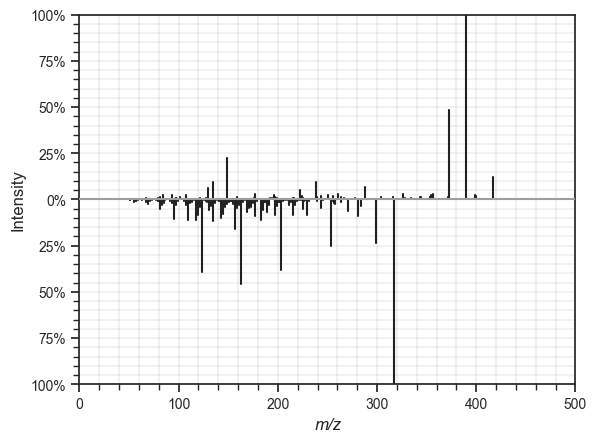

In [80]:
sup.mirror(spectra_0, spectra_1)

Ground truth

In [81]:
print(f'Edit distance {ground_truth_ed[index_reference, index_query]}, MCES distance {ground_truth_mces[index_reference, index_query]}')

Edit distance 5.0, MCES distance 20.0


Prediction

In [82]:
print(f'Edit distance {sim_ed[index_reference, index_query]}, MCES distance {sim_mces[index_reference, index_query]}')

Edit distance 0, MCES distance 9.388504028320312


In [89]:
n_classes = 6
penalty_matrix = np.array([[abs(i - j) for j in range(n_classes)] for i in range(n_classes)])
penalty_matrix= (n_classes-1) - penalty_matrix

In [90]:
penalty_matrix

array([[5, 4, 3, 2, 1, 0],
       [4, 5, 4, 3, 2, 1],
       [3, 4, 5, 4, 3, 2],
       [2, 3, 4, 5, 4, 3],
       [1, 2, 3, 4, 5, 4],
       [0, 1, 2, 3, 4, 5]])

In [95]:
penalty_matrix**2/np.sum(penalty_matrix**2, axis=0)

array([[0.45454545, 0.22535211, 0.11392405, 0.05063291, 0.01408451,
        0.        ],
       [0.29090909, 0.35211268, 0.20253165, 0.11392405, 0.05633803,
        0.01818182],
       [0.16363636, 0.22535211, 0.3164557 , 0.20253165, 0.12676056,
        0.07272727],
       [0.07272727, 0.12676056, 0.20253165, 0.3164557 , 0.22535211,
        0.16363636],
       [0.01818182, 0.05633803, 0.11392405, 0.20253165, 0.35211268,
        0.29090909],
       [0.        , 0.01408451, 0.05063291, 0.11392405, 0.22535211,
        0.45454545]])

In [254]:
2.31/1.75

1.32

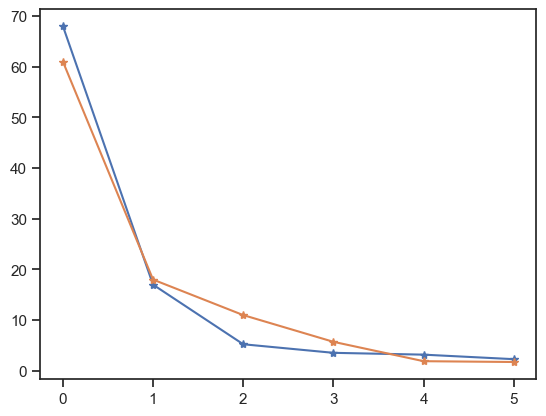

In [253]:
plt.plot([68, 17,  5.25, 3.56, 3.2,   2.31], marker='*',label='preview')
plt.plot([61, 18,   11 , 5.73 ,1.91 , 1.75],  marker='*', label='smooth')

In [109]:
def log_conversion(x, a=2):
            scaling_factor = np.log(a + 1)
            logits2_for_loss = np.log((a + 1) - (a * x)) / scaling_factor
            return 1 - logits2_for_loss

In [110]:
x=np.arange(0,1000)/1000

In [111]:
y=log_conversion(x, a=100)

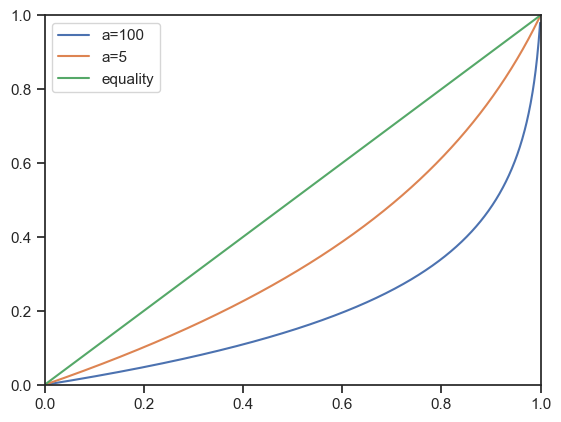

In [257]:
plt.plot(x,log_conversion(x, a=100), label='a=100')
plt.plot(x,log_conversion(x, a=5), label='a=5')
plt.plot(x,x, label='equality')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()

In [133]:
from rdkit import Chem
from rdkit.Chem import inchi

smiles = "CCO"  # Example: ethanol
mol = Chem.MolFromSmiles(smiles)

# Convert to InChI
inchi_str = inchi.MolToInchi(mol)

# Convert to InChIKey
inchi_key = inchi.InchiToInchiKey(inchi_str)

print(inchi_key)

LFQSCWFLJHTTHZ-UHFFFAOYSA-N


In [141]:
molecular_file= '/Users/sebas/projects/data/edit_distance_neurips_nist_exhaustive.pkl'

In [142]:
pwd

'/Users/sebas/projects/metabolomics/notebooks/final_tutorials'

In [143]:
ls ~/projects/data/

ALL_GNPS_NO_PROPOGATED_wb.mgf
GNPS-NIH-NATURALPRODUCTSLIBRARY.mgf
MassSpecGym.mgf
all_spectrums_gnps.pkl
all_spectrums_gnps_nist_20240130_gnps_nist_janssen.pkl
all_spectrums_janssen.pkl
all_spectrums_nist.pkl
all_spectrums_temp.pkl
best_model.ckpt
best_model_100_millions_more_epochs.ckpt
best_model_100_millions_more_epochs_day3.ckpt
best_model_1024n_10layers.ckpt
best_model_128n_10_layers_20240209.ckpt
best_model_128n_5_layers_20240219_elementwise.ckpt
best_model_128n_5_layers_20240229.ckpt
best_model_128n_5_layers_20240303.ckpt
best_model_150_millions.ckpt
best_model_20240301.ckpt
best_model_20240318_lib_cos_sim.ckpt
best_model_20240319_v2_512u_5_layers.ckpt
best_model_20240409_10_million_not_bining_sim_1.ckpt
best_model_20240409_1_million_not_bining_sim_1.ckpt
best_model_20240411_no_identity.ckpt
best_model_20240411_no_sim1.ckpt
best_model_20240507_100_millions_no_identity.ckpt
best_model_20250220_logloss.ckpt
best_model_exhaustive_128n_20240522.ckpt
best_model_exhaustive_sampled_128

In [149]:
import pickle
import sys
import simba
sys.modules['src']=simba
with open(molecular_file, 'rb') as f:
    data= pickle.load(f)

In [156]:
spectrums_unique=data['molecule_pairs_train'].spectrums + data['molecule_pairs_val'].spectrums + data['molecule_pairs_test'].spectrums

In [162]:
from rdkit import Chem
from rdkit.Chem import inchi

def get_inchi_key(smiles):
    mol = Chem.MolFromSmiles(smiles)

    # Convert to InChI
    inchi_str = inchi.MolToInchi(mol)
    
    # Convert to InChIKey
    inchi_key = inchi.InchiToInchiKey(inchi_str)
    return inchi_key

In [163]:
len(spectrums_unique)

42774

In [165]:
import pandas as pd
list_smiles=[]
list_inchi=[]
for s in spectrums_unique:
    smiles=s.params['smiles']
    inchi_key = get_inchi_key(smiles)
    list_smiles.append(smiles)
    list_inchi.append(inchi_key)
df_results= pd.DataFrame()
df_results['smiles']=list_smiles
df_results['inchi_key']=list_inchi

In [166]:
df_results

,smiles,inchi_key
0,NCCO,HZAXFHJVJLSVMW-UHFFFAOYSA-N
1,C1CCNC1,RWRDLPDLKQPQOW-UHFFFAOYSA-N
2,CC(=O)C=O,AIJULSRZWUXGPQ-UHFFFAOYSA-N
3,CC=CCO,WCASXYBKJHWFMY-UHFFFAOYSA-N
4,CCCC=O,ZTQSAGDEMFDKMZ-UHFFFAOYSA-N
...,...,...
42769,CC1OC(OC(=O)C23CCC4(C)C(=CCC5C6(C)CC(O)C(OC7OC...,GYDFFKXZDJBBTA-UHFFFAOYSA-N
42770,CC1OC(OC2C(O)CC3(C)C(C(O)CC4(C)C3CC=C3C5CC(C)(...,CQWIBPNPRFMAOF-UHFFFAOYSA-N
42771,CC1OC(OC2C(CO)OC(OC(=O)C34CCC(C)(C)CC3C3=CCC5C...,QKMZOFZYVGJLGS-UHFFFAOYSA-N
42772,CC(=O)NC(Cc1ccccc1)C(=O)NC(C)(C)C(=O)NC(C)(C)C...,OESVNVWXOTVKHT-UHFFFAOYSA-N
